# EDA Notebook for Analysis of fin ratios

### Understanding the trend of different financial ratios and metric is a critical part in analysis of business. This notebook explores those trends to give the sense of stability of business, growth hsitory, returns and margins. 

In [1]:
import pandas as pd
import numpy as np
import sys
sys.path.append("..")
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from data.scripts.simplified_finance_stats.fin_stats import fin_stats
from data.scripts.simplified_finance_stats.fin_ratios import get_ratios
from data.scripts.simplified_finance_stats.fin_stats_2 import fin_stats_2
from report_13f.brk.company_13f import company_13f
from data.scripts.build_training_data.train_data import train_data
from data.scripts.simplified_finance_stats.stock_stats import stock_stats

pd.options.display.max_rows = 999

In [2]:
# Set path for data
base_path = '../data/'
sheets_path = 'combined_simplified/combined_all_us.csv' 
other_path = 'combined_simplified/others_all_us.csv'
mkt_path = 'combined_simplified/stock_stats_all_us.csv'


Three kinds of data are used here.
1. The basic fundamental financial data from balance sheet, income statement and cash flow statement
2. Other financial data not included in the above statements
3. Market data related to the stock such as mkt_cap, price etc

In [3]:
# setup all data
finances = fin_stats(base_path + sheets_path)
fin_others = fin_stats_2(base_path + other_path)
mkt_data = stock_stats(base_path + mkt_path)

In [4]:
tick = 'AAPL'
b = finances.get_sheet(tick,"balance_sheet")
i = finances.get_sheet(tick,"income_sheet")
c = finances.get_sheet(tick,"cashflow_sheet")
o = fin_others.get_sheet(tick)
mk = mkt_data.get_stock_data(tick)

# combine all dataset
all_fin_data = pd.concat([b,i,c,o,mk])

Build ratios dataframe from the above data

In [5]:
df_ratios = get_ratios(b,i,c,o,mk)

#### Understand trends for various financial metrics and ratios

In [6]:
from data.scripts.simplified_finance_stats.capture_trends import get_trend_data

In [7]:
# Specify the timeline with last n years to get data from

def get_last_n_data(df,n):
    """Returns the trend data for last n years"""
    last_n_years = n
    cols_to_keep = df.columns.tolist()[-1*last_n_years::]
    df = df[cols_to_keep]
    return df

df_ratios = get_last_n_data(df_ratios,12)
d = get_trend_data(df_ratios)

In [8]:
d.head()

,mean,std,avg_growth_rate,slope,constant,r2
gross_mrgn,0.405829,0.045937,-0.029160,0.010138,-19.987374,0.633224
prft_mrgn,0.199581,0.045620,-0.053509,0.008740,-17.380615,0.477127
oper_mrgn,0.262274,0.063052,-0.053316,0.011492,-22.852997,0.431826
capx_to_rev,0.042480,0.011189,-0.028548,0.002712,-5.411963,0.763572
ni_to_rev,0.014623,0.008575,-18.792738,-0.001213,2.455264,0.260287


Currently, get_trend_data, fits a linear regression model. In the above dataframe, the slope and constant are the outputs of the model. I believe fitting too complex models to financial data is not very helpful especially if we are looking into general trends. It is better to be roughly right than precisely wrong.

In [9]:
df_ratios.head()

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
gross_mrgn,0.300689,0.352037,0.356569,0.417341,0.408064,0.421621,0.459191,0.415780,0.429350,0.445526,0.434769,0.429007
prft_mrgn,0.102977,0.145630,0.148835,0.191936,0.214841,0.239466,0.266651,0.216705,0.216144,0.228458,0.212408,0.210924
oper_mrgn,0.127000,0.183662,0.193202,0.273628,0.281870,0.312151,0.352960,0.286695,0.287223,0.304773,0.276516,0.267604
capx_to_rev,0.034015,0.030617,0.033591,0.026664,0.030740,0.039354,0.053000,0.047774,0.052359,0.048123,0.059203,0.054316
ni_to_rev,0.022366,0.017412,0.019028,0.009556,0.014994,0.022596,0.032062,0.008238,0.008890,-0.000043,0.010363,0.010007


Plot regression and distribution of df_ratios dataframe

In [10]:
# Plotting the data

def plot_trends(df,df_trends):

    x = np.asarray(df.columns.tolist())

    for i, feature in enumerate(df.index.tolist()):
        y = df.loc[feature].values
        y2 = df_trends['slope'].loc[feature]*x + df_trends['constant'].loc[feature]
        r2_val = round(df_trends['r2'].loc[feature],3)
        
        try:
            # call regplot on each axes
            fig, (ax1, ax2) = plt.subplots(ncols=2)
            fig.set_size_inches(15,5)
            sns.distplot(y,kde=1,bins=20,rug=1,norm_hist=0,color='g', ax=ax1)
            ax1.set_title(tick + ' ' + feature + ' - Distribution')
            sns.regplot(x, y,label='R2: ' + str(r2_val), ax=ax2)
            ax2.set_title(tick + ' ' + feature + ' - Regression')
            ax2.legend(loc='best')
            plt.show()
        except:
            pass


In [ ]:
plot_trends(df_ratios,d)

In [11]:
# Plot fundamental data
all_fin_data = get_last_n_data(all_fin_data,12)
d_trend_all = get_trend_data(all_fin_data)

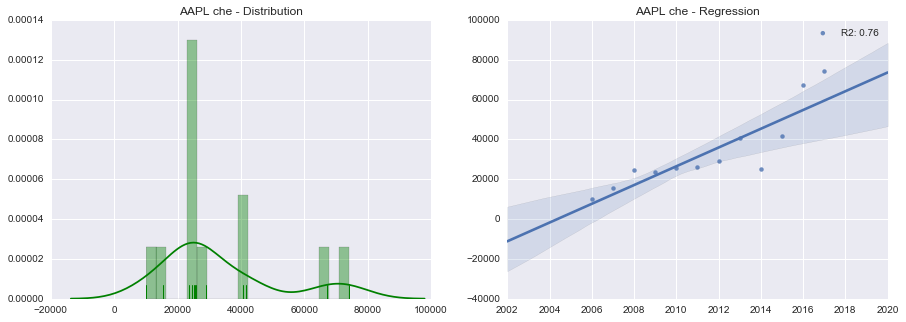

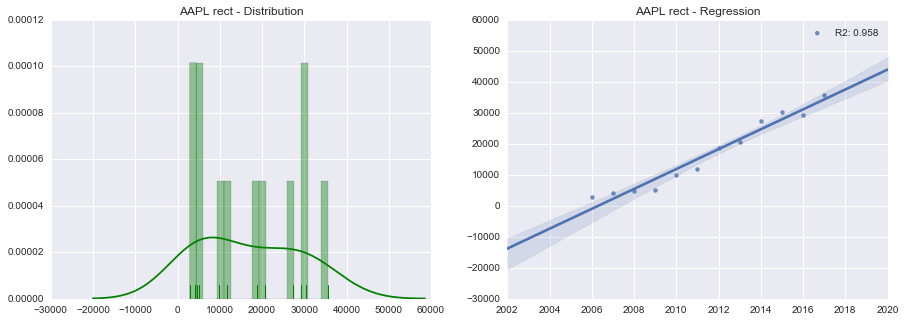

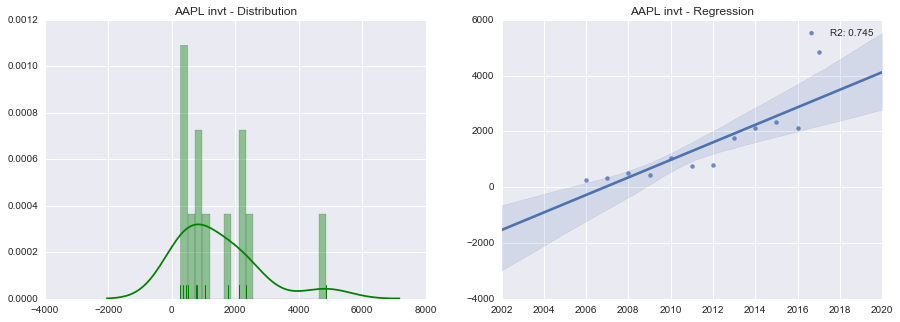

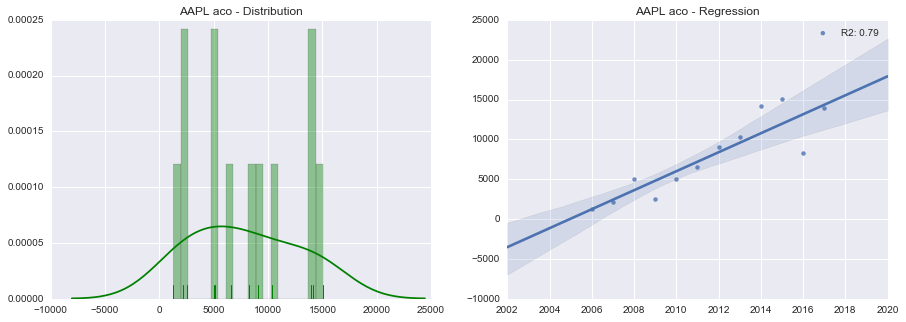

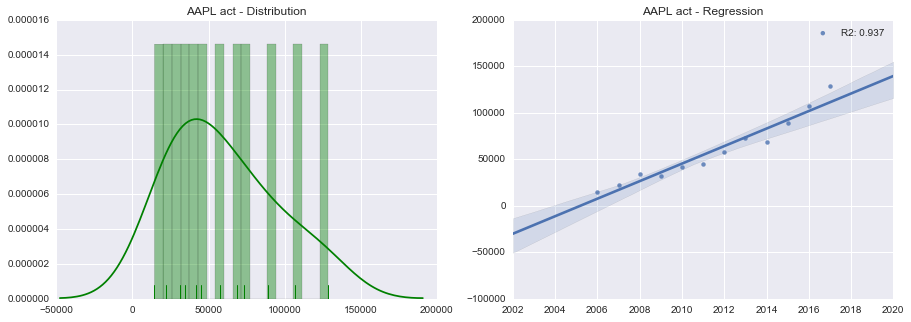

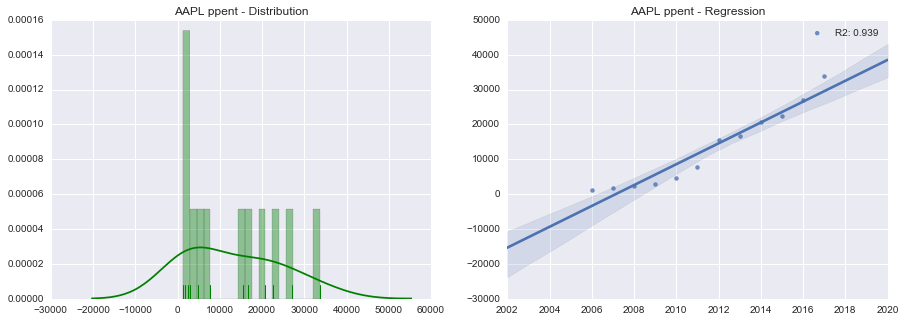

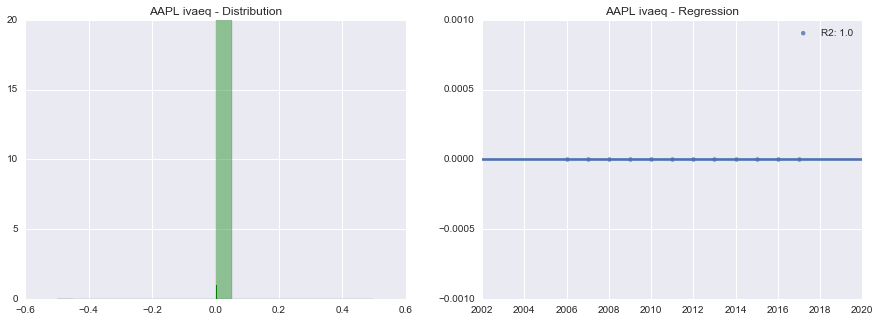

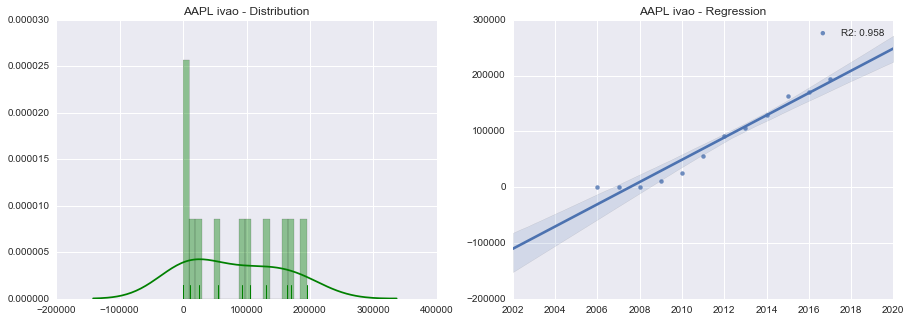

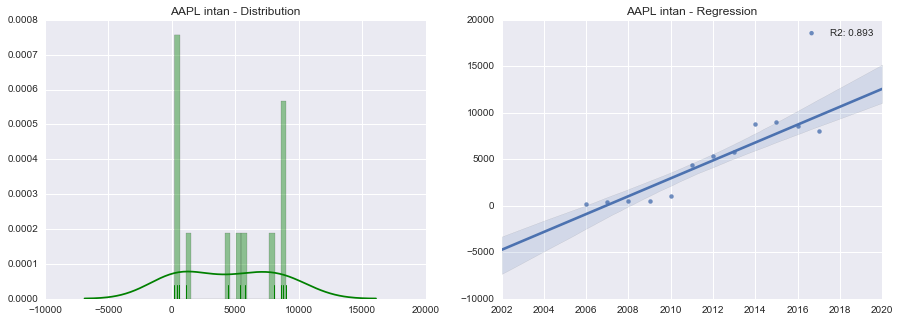

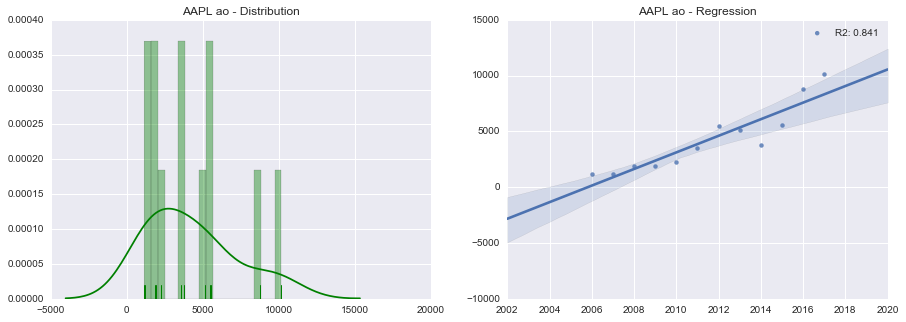

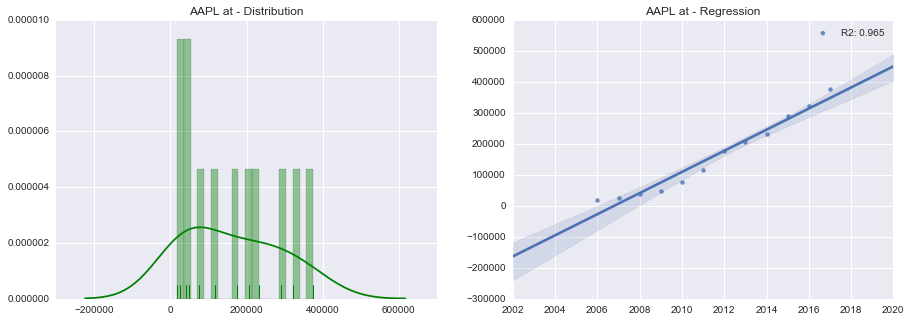

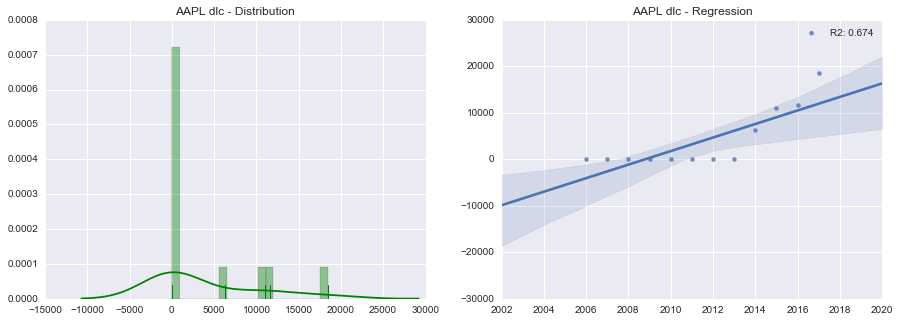

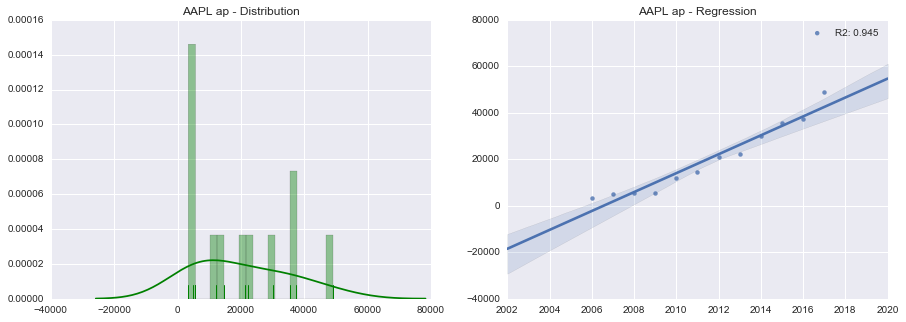

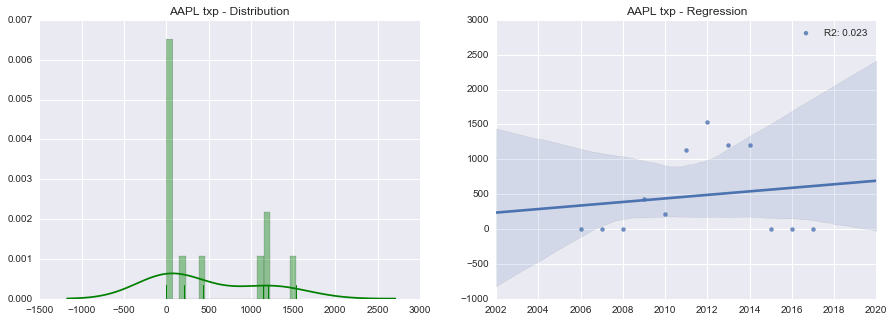

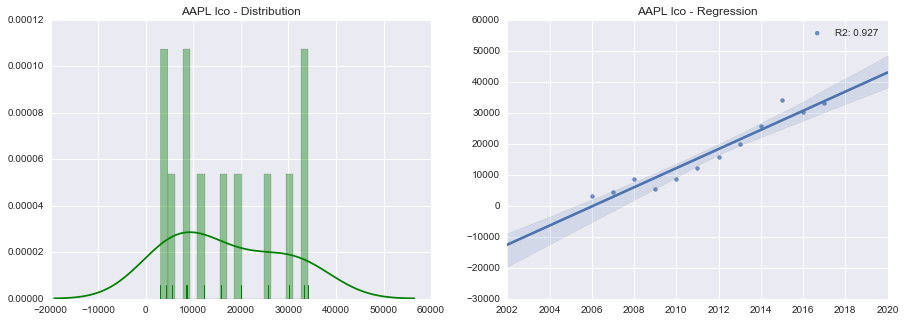

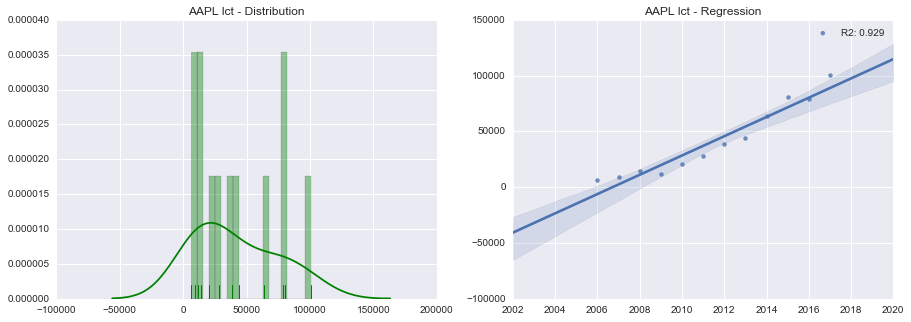

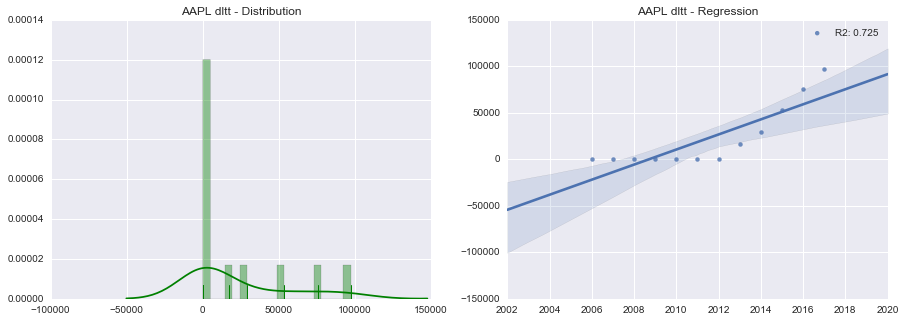

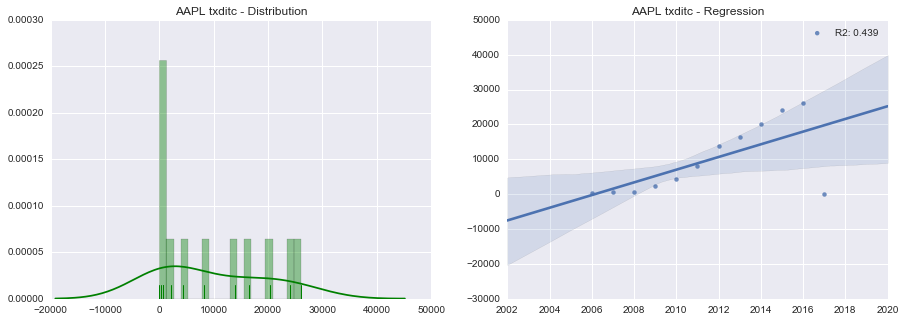

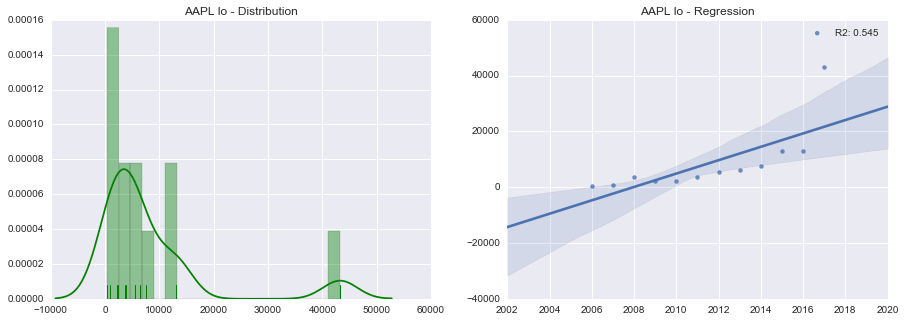

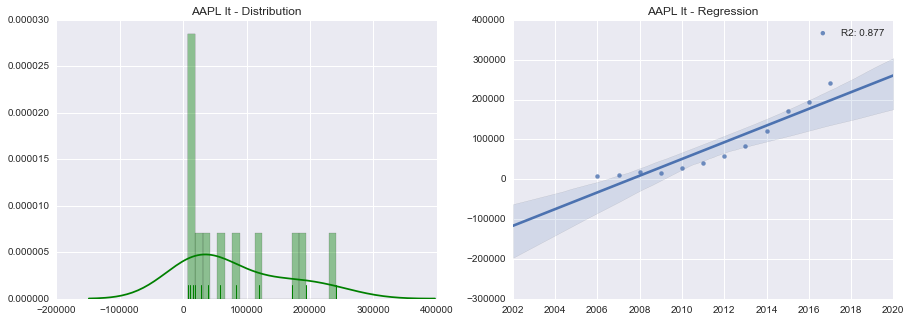

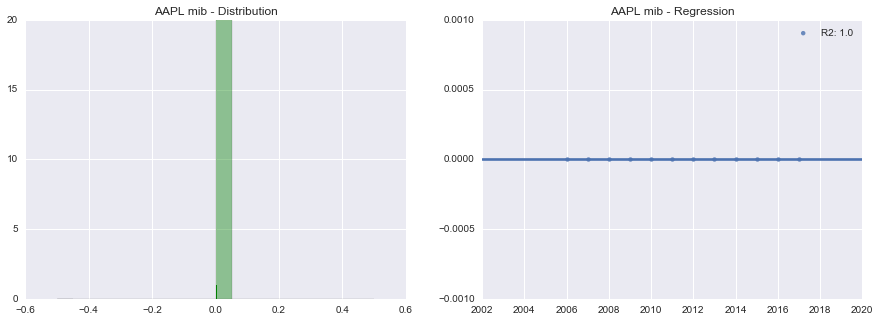

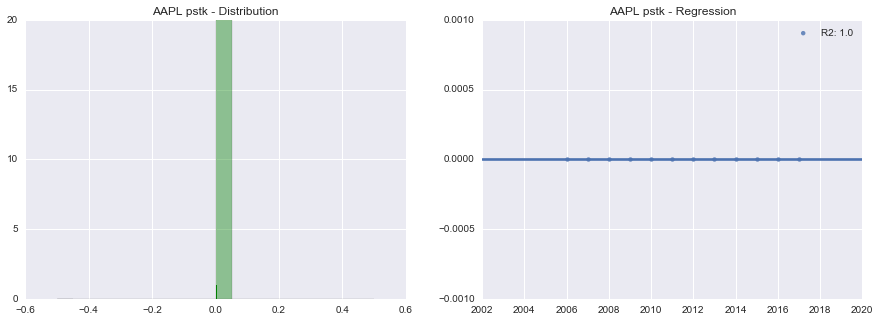

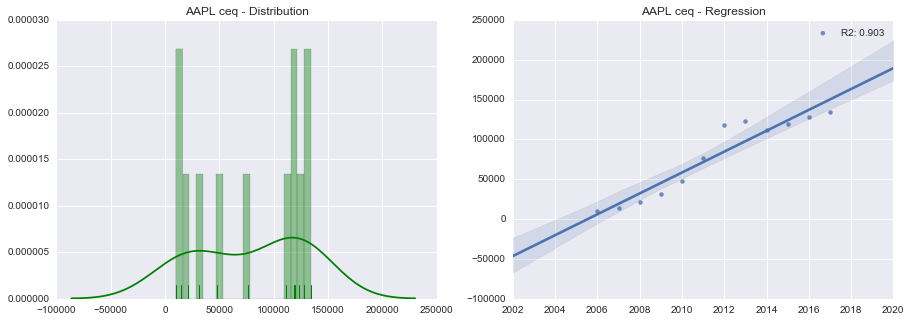

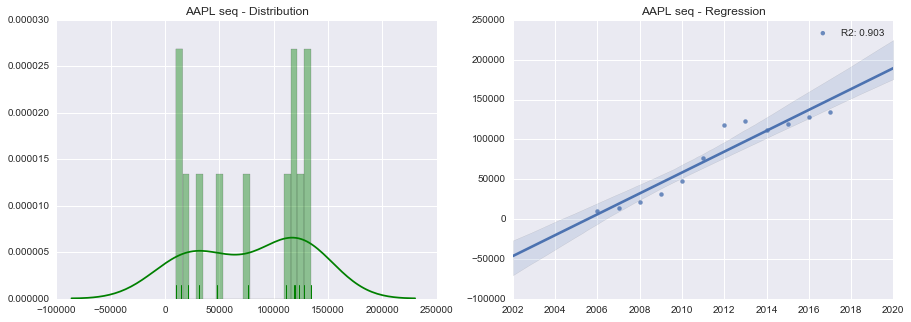

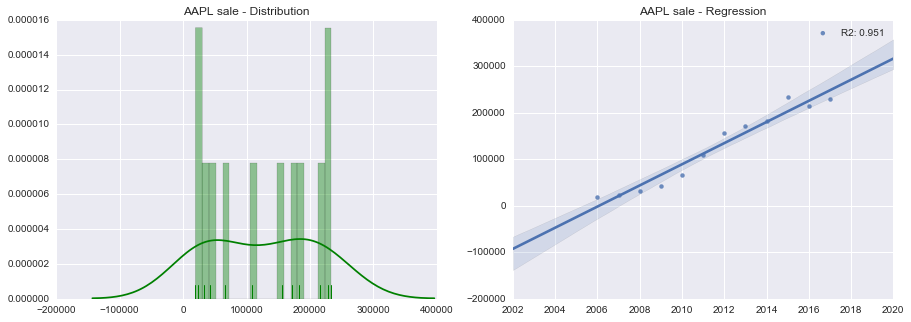

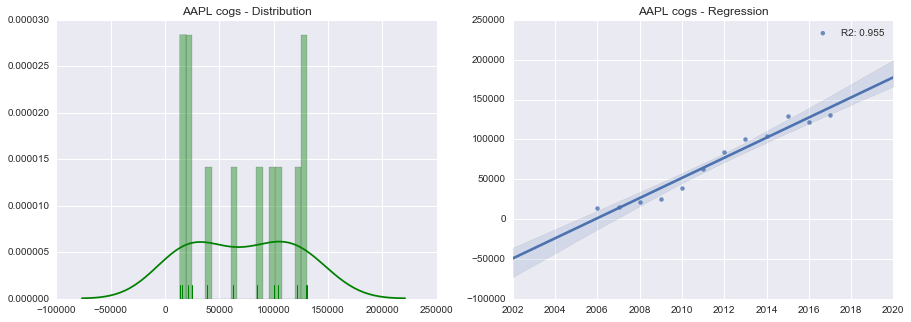

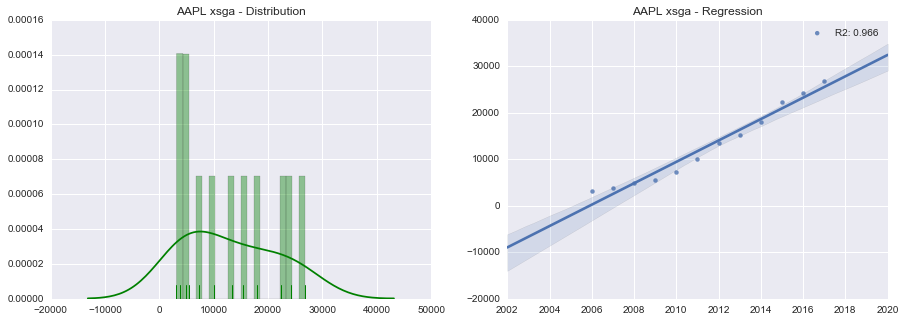

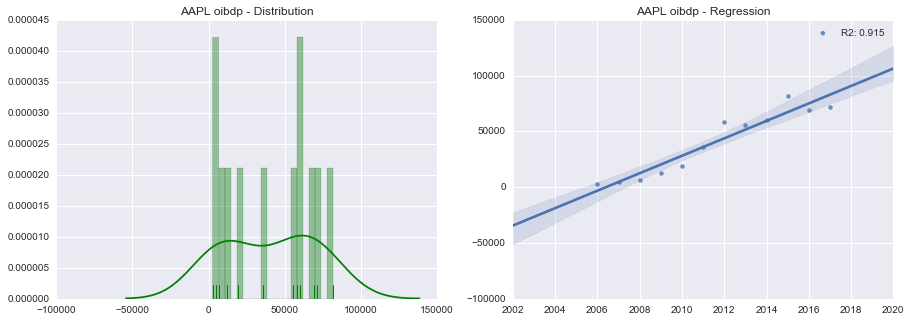

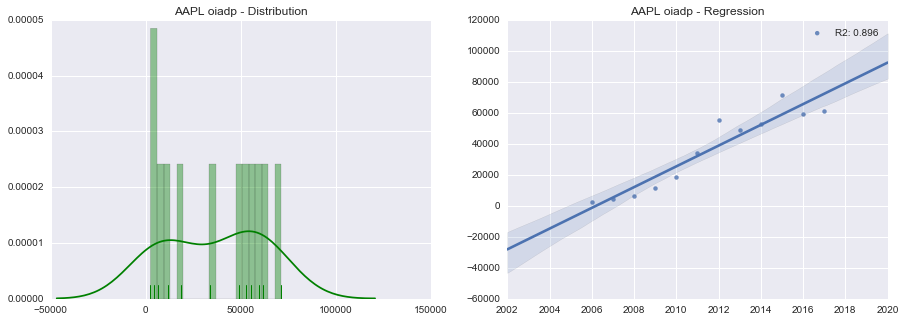

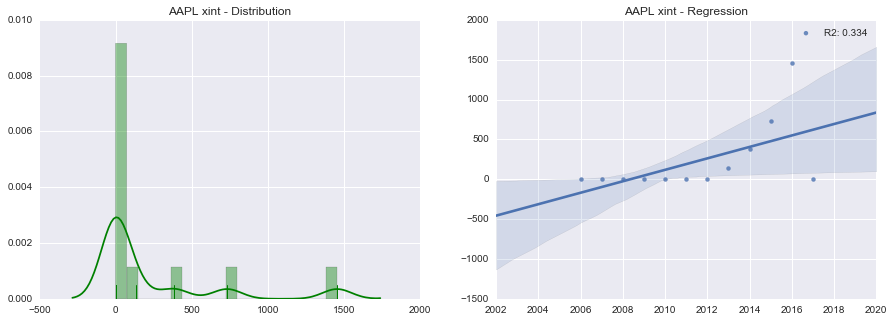

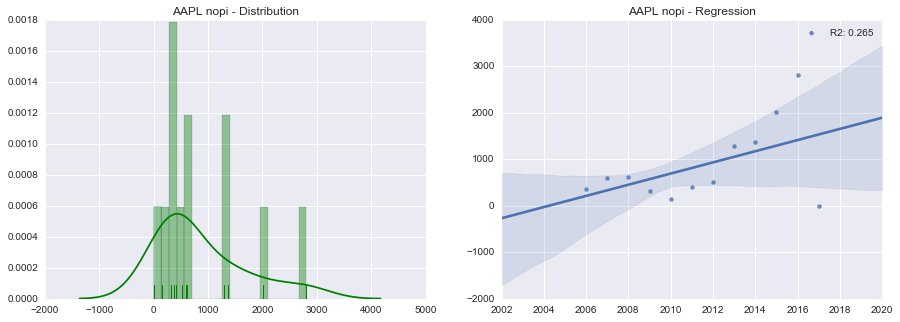

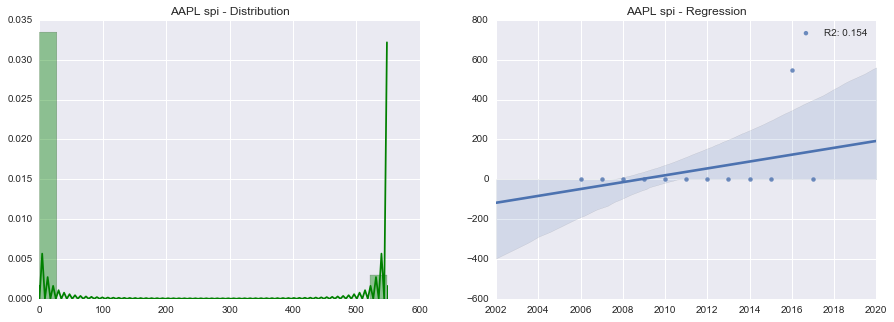

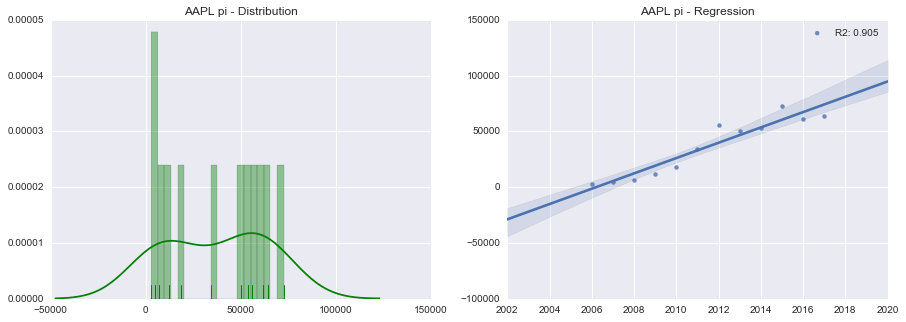

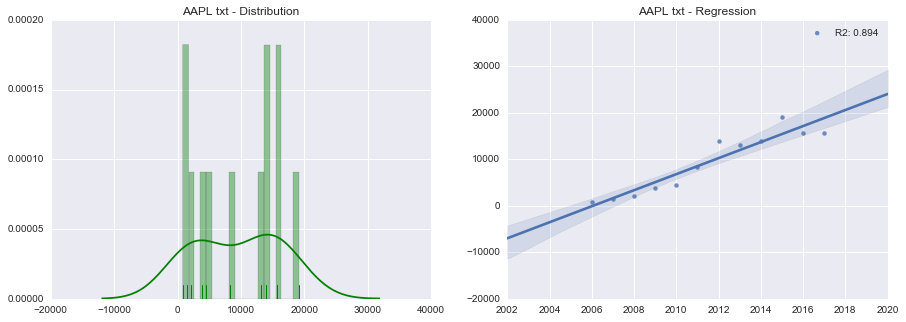

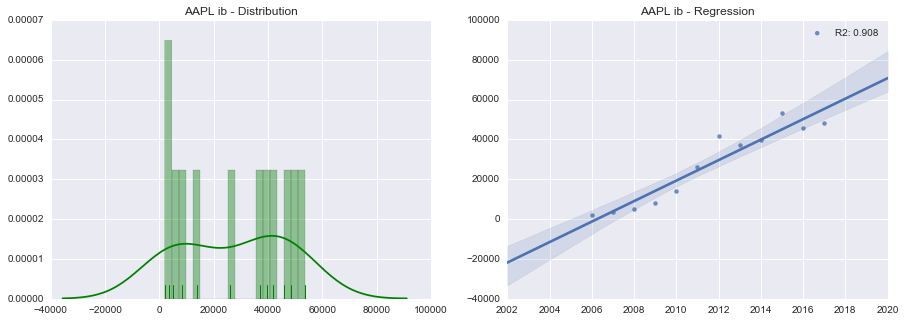

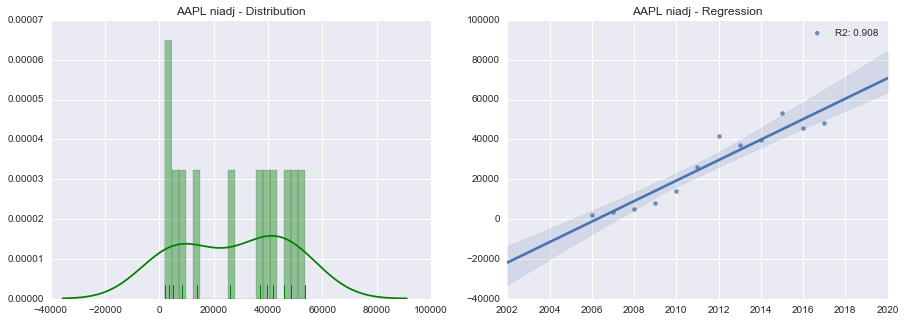

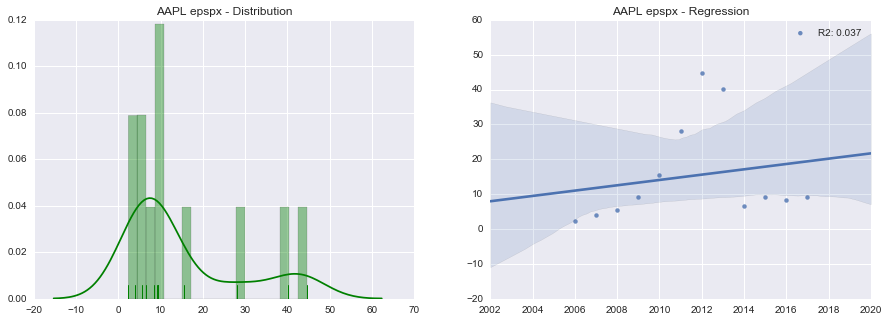

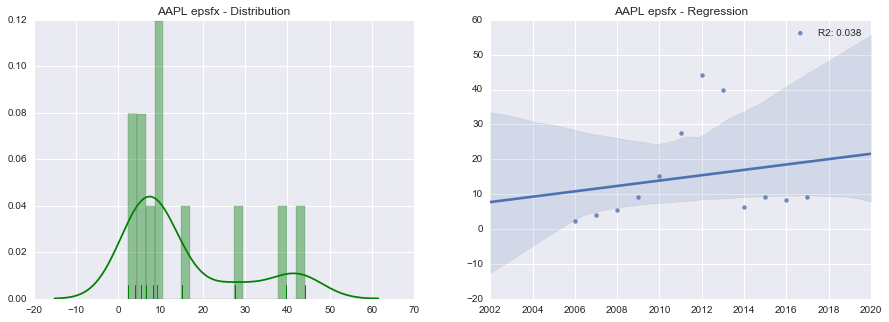

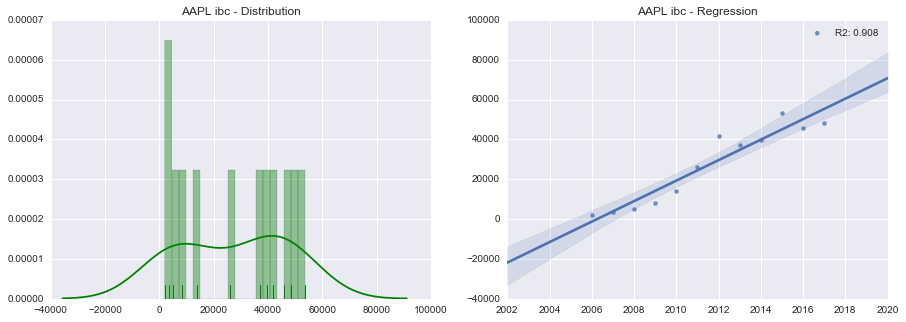

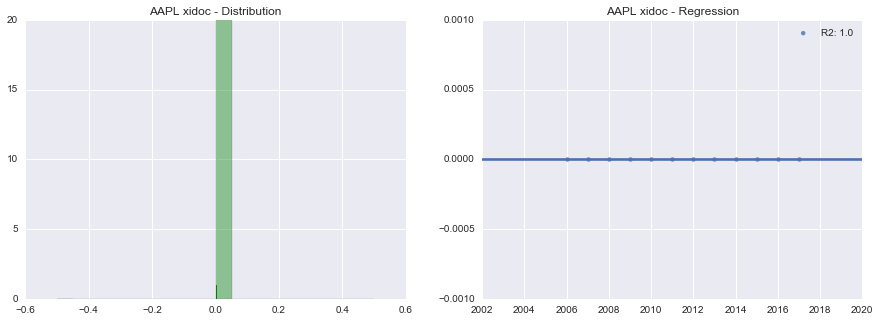

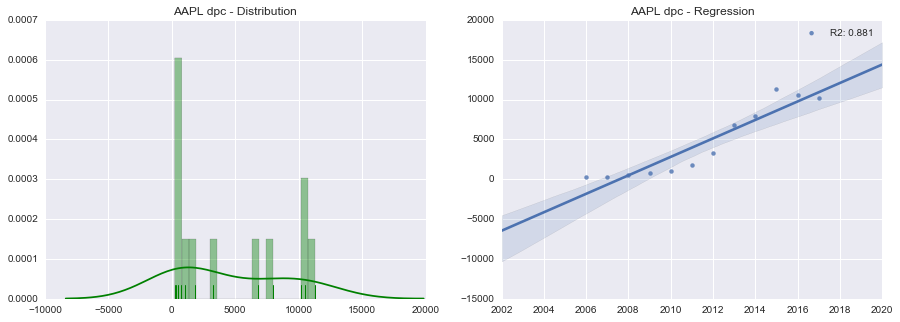

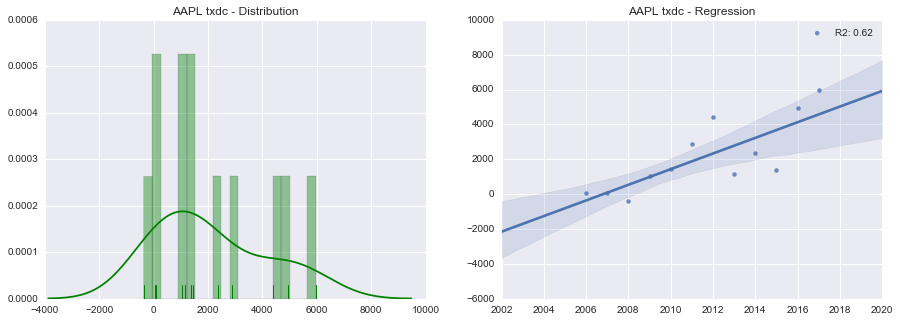

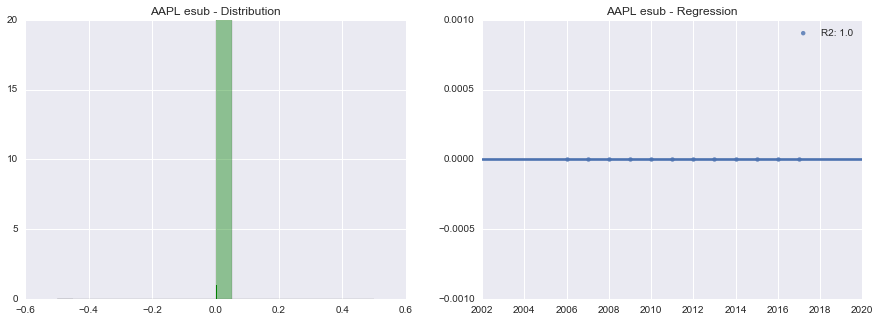

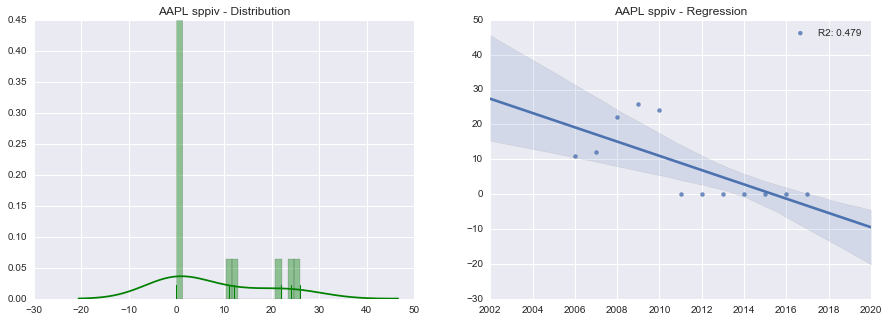

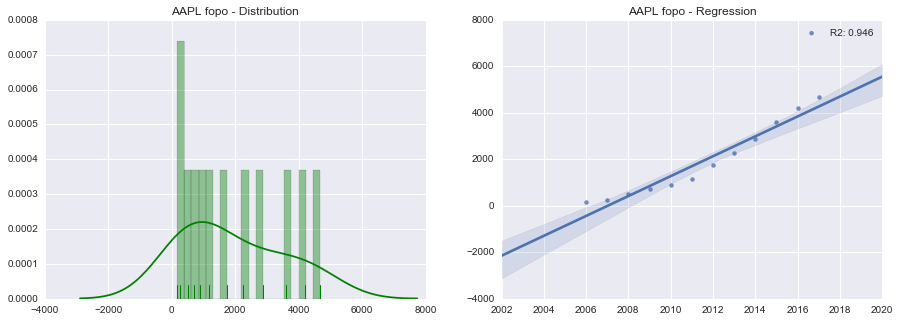

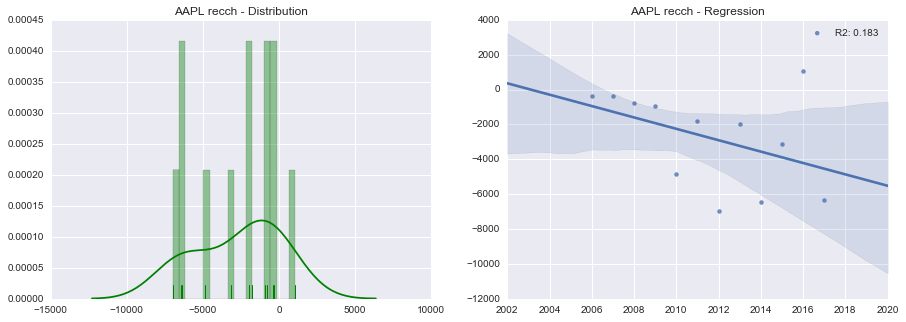

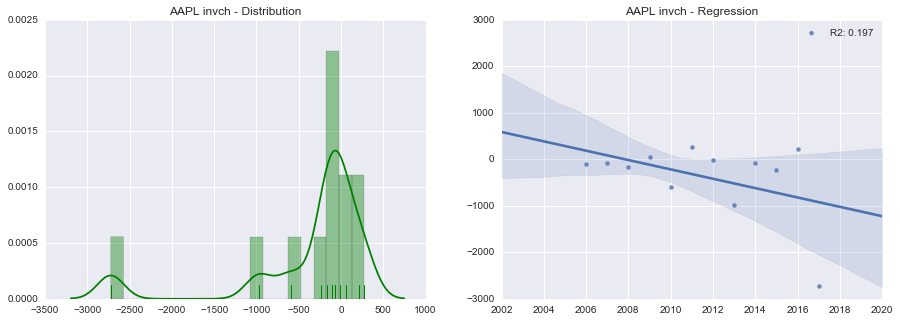

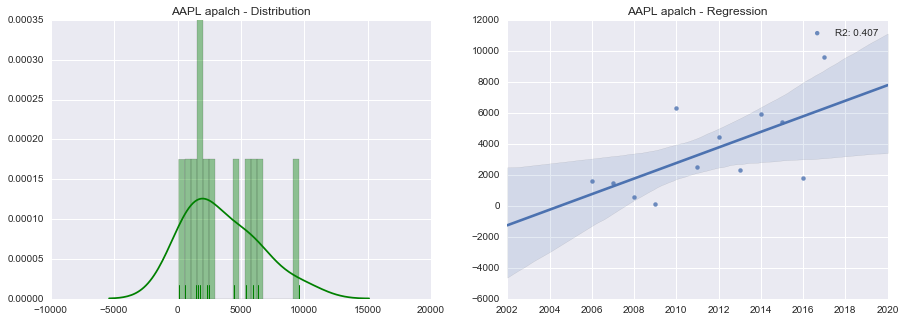

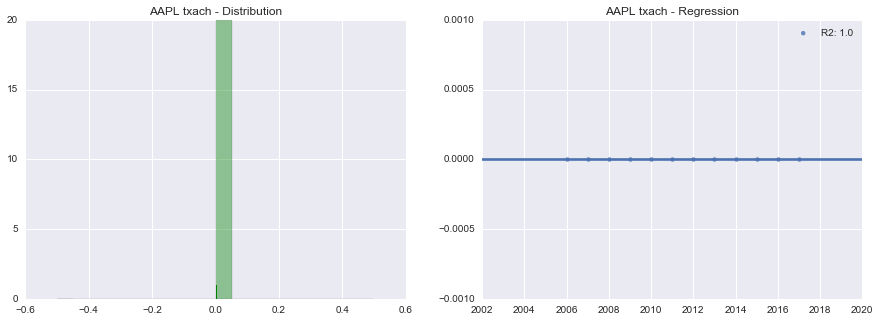

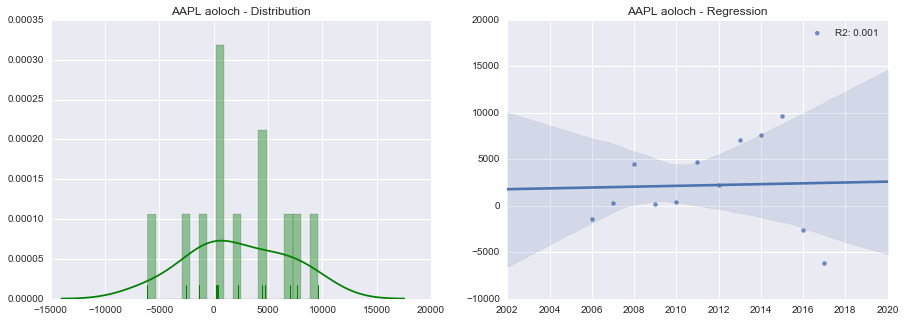

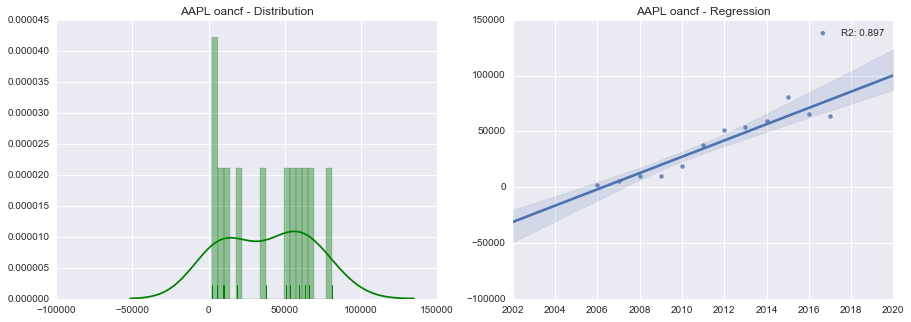

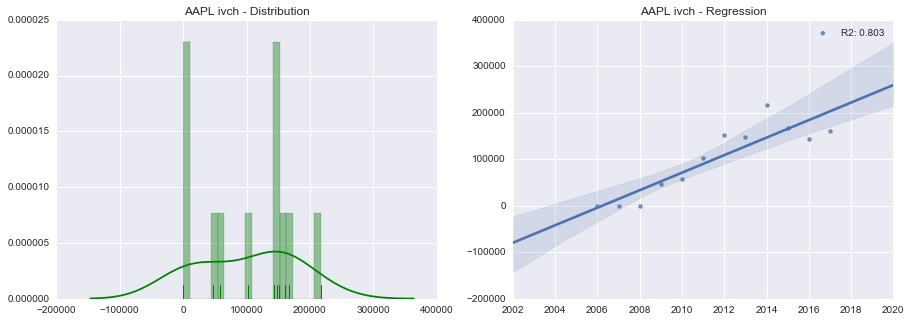

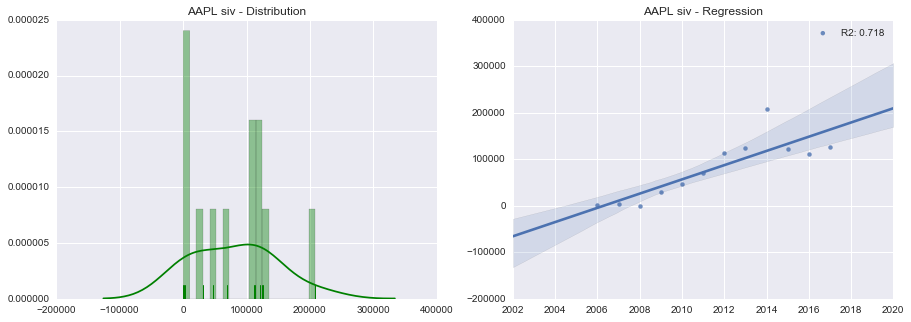

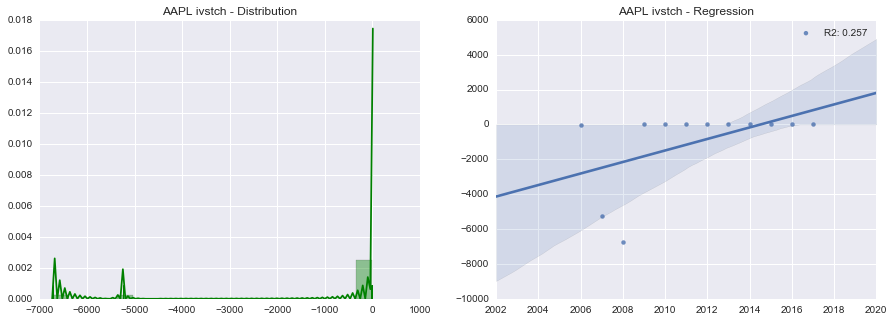

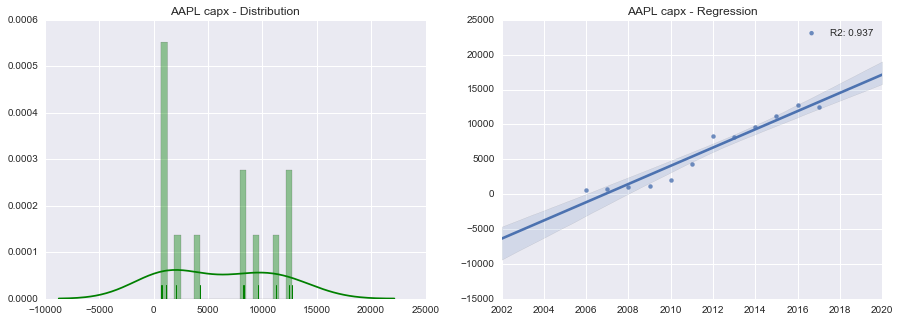

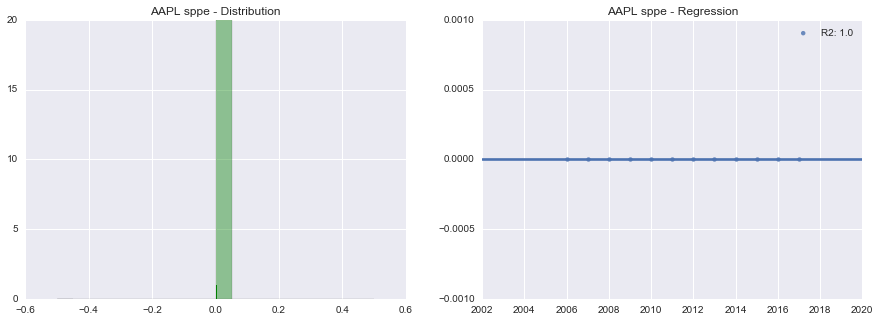

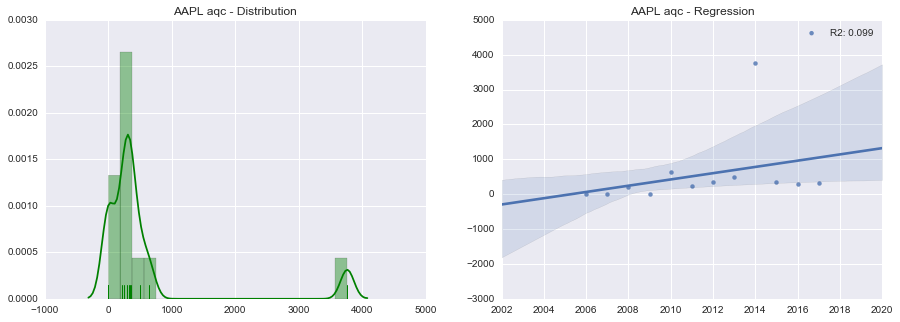

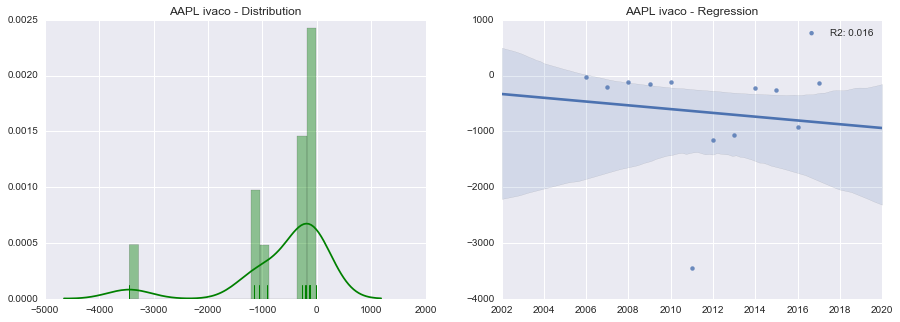

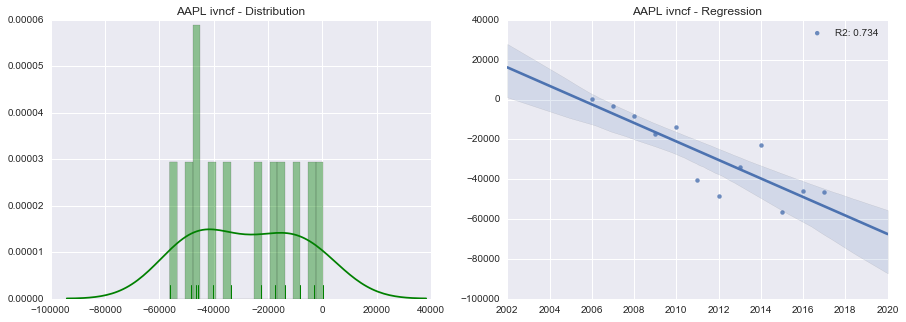

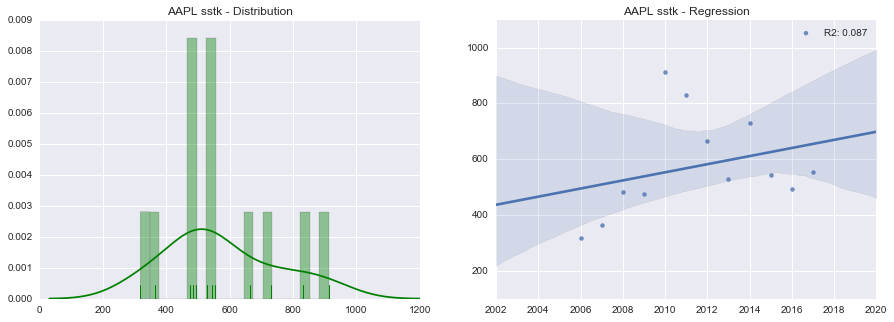

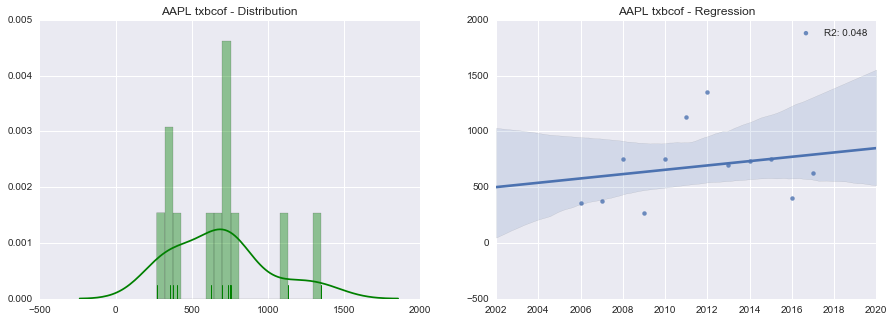

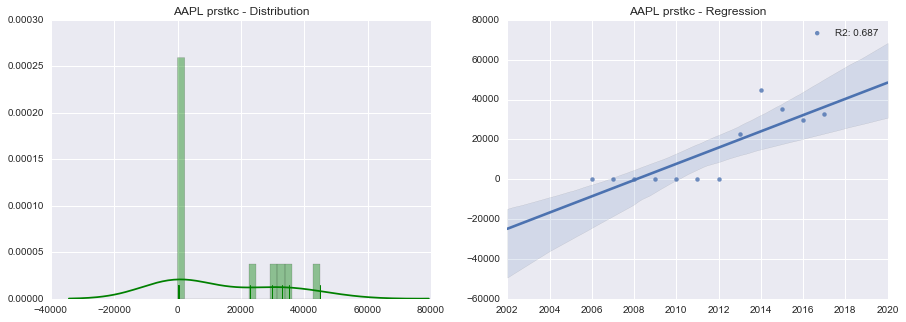

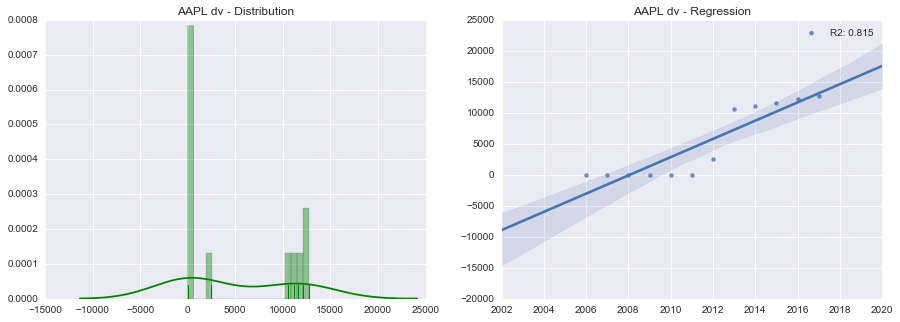

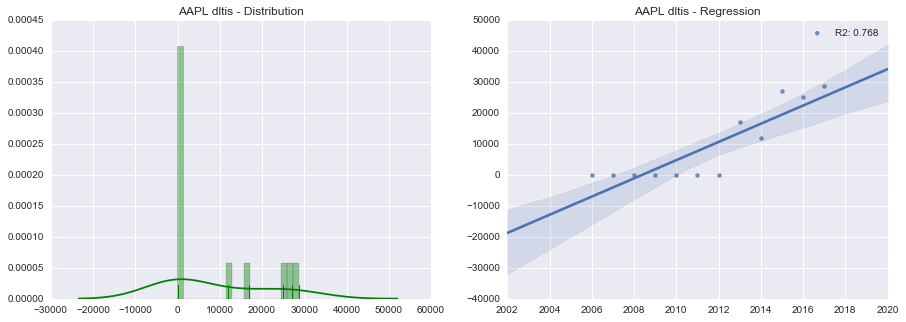

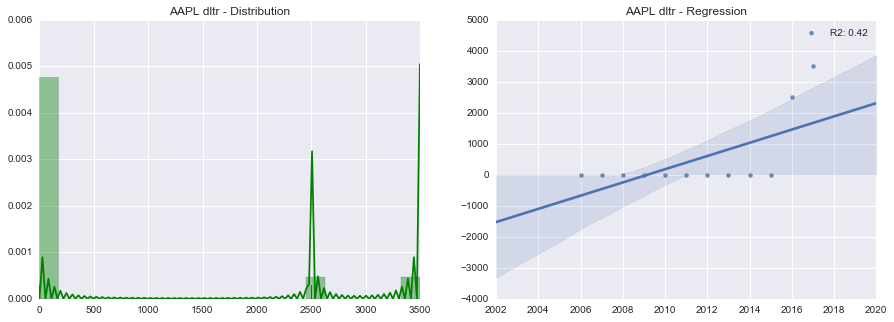

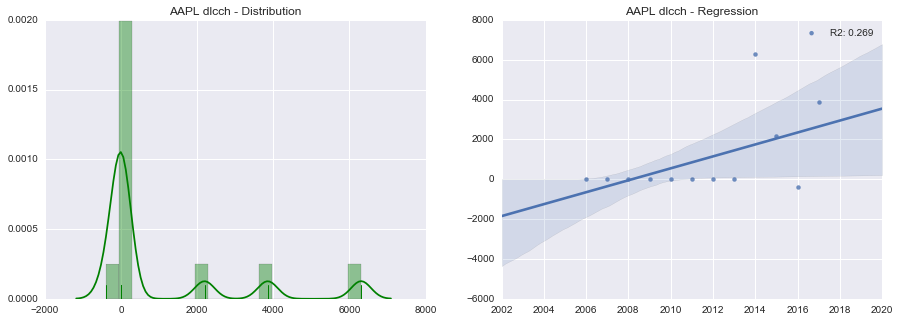

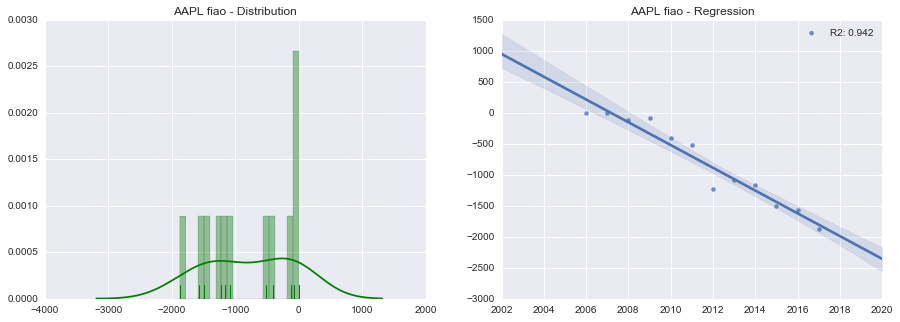

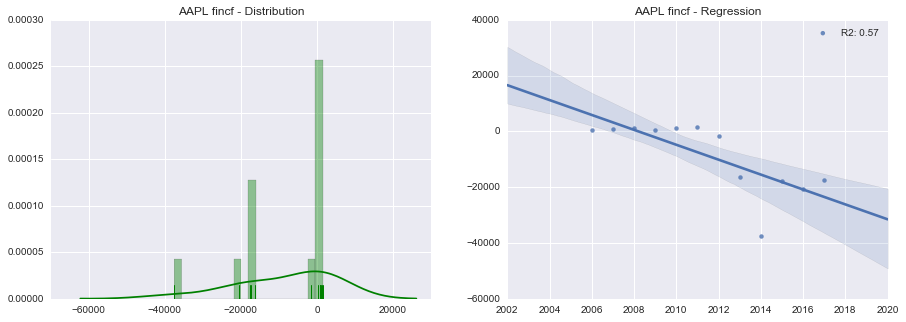

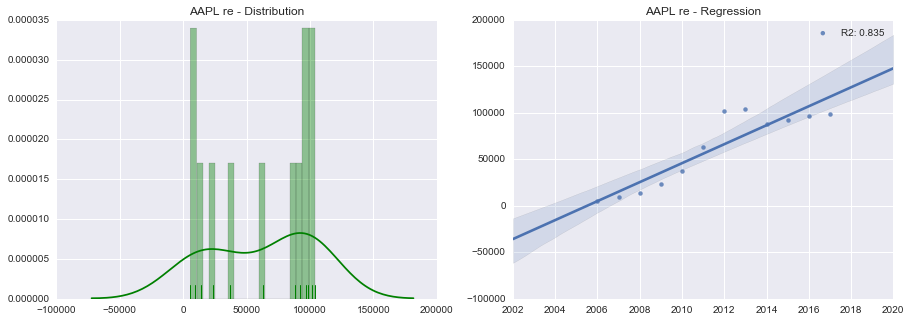

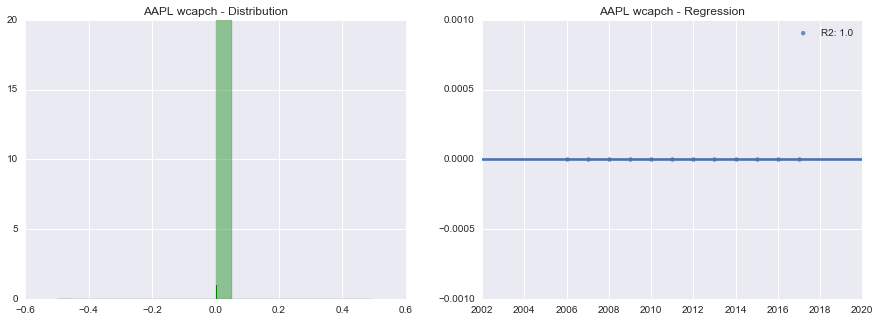

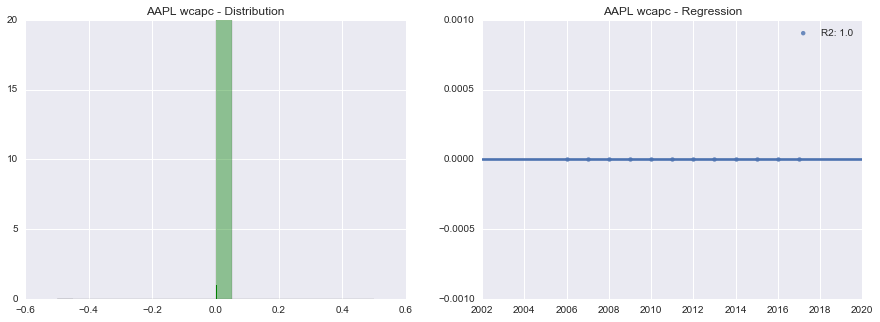

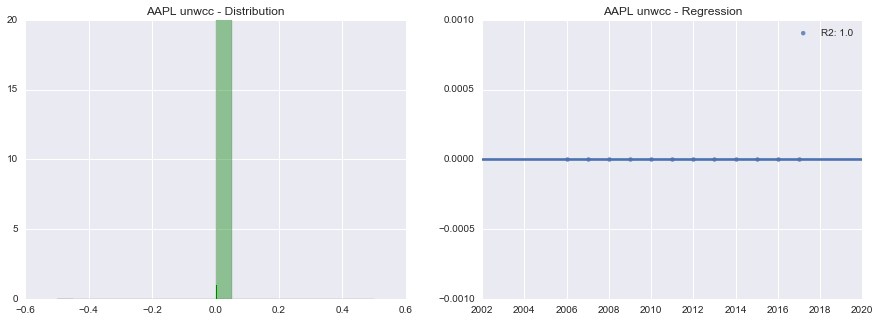

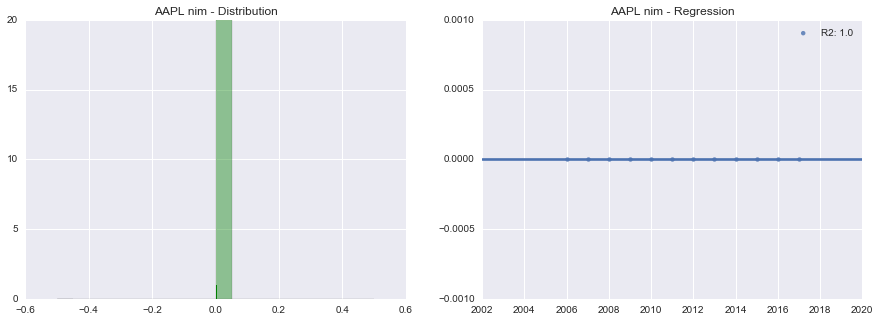

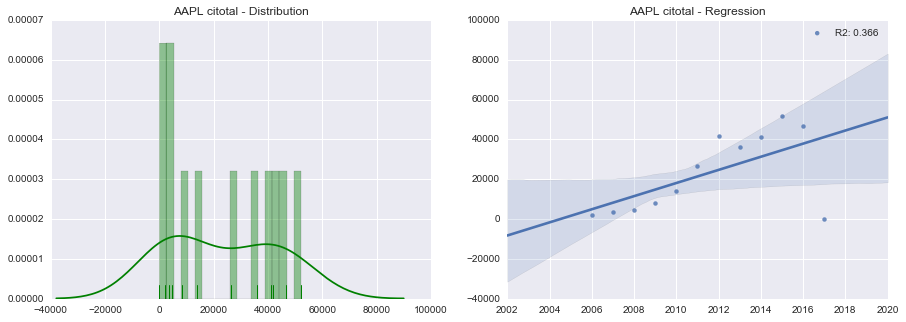

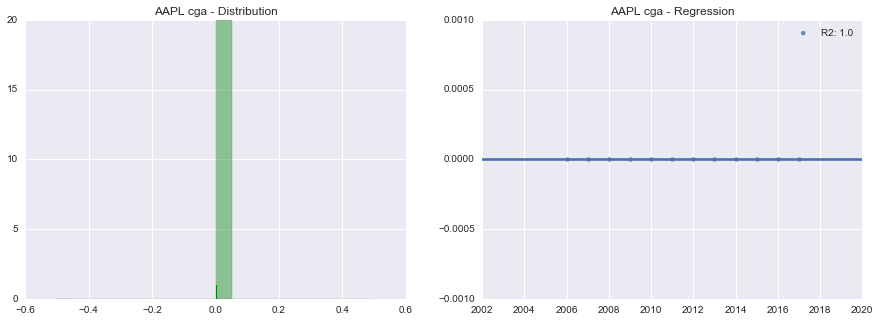

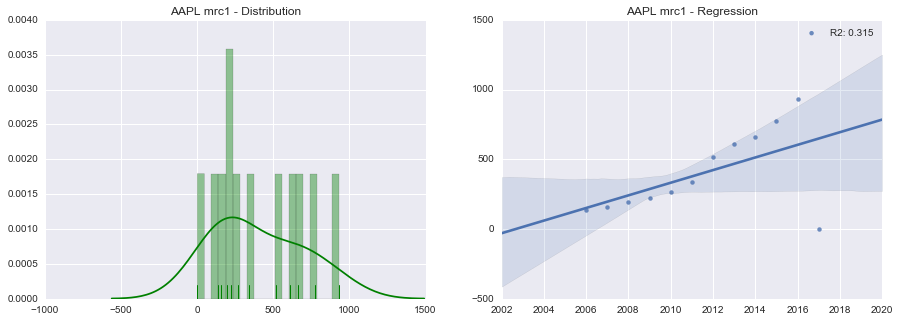

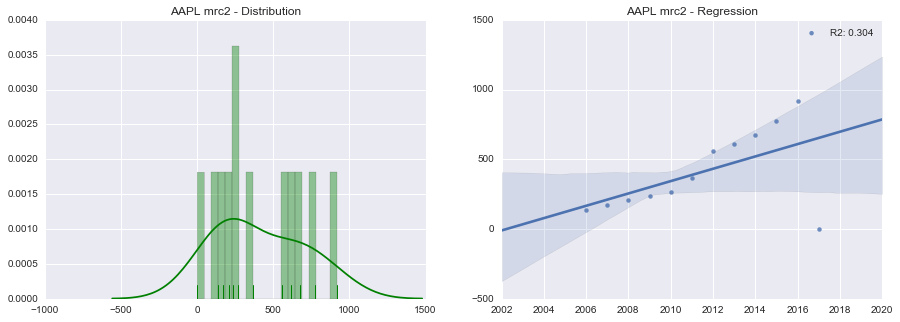

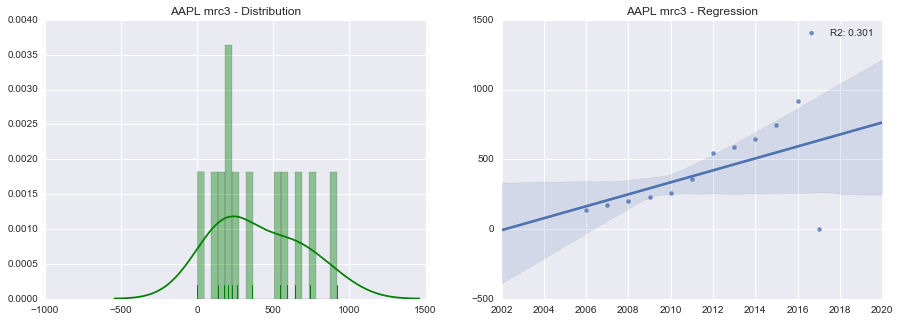

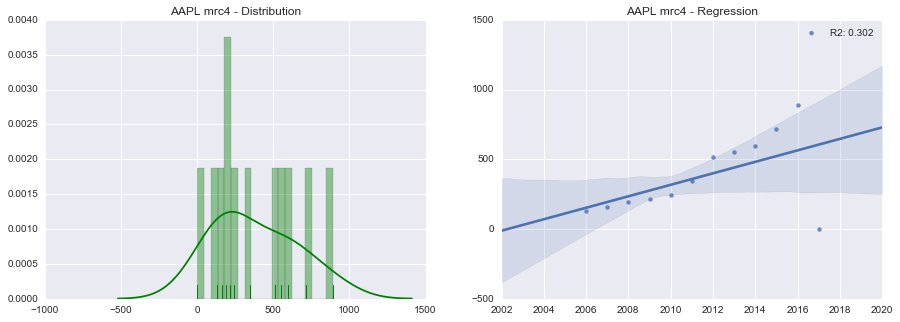

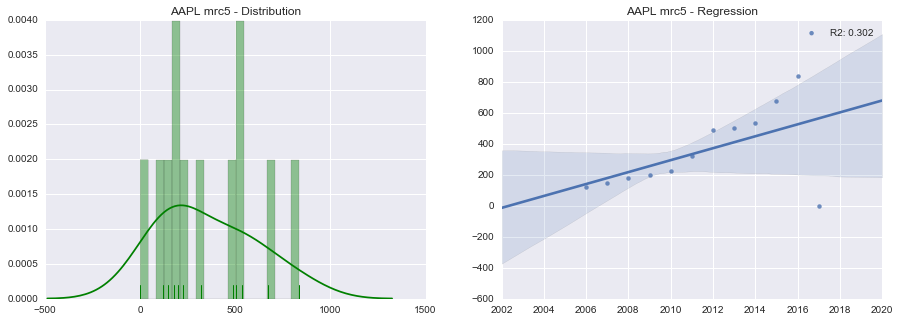

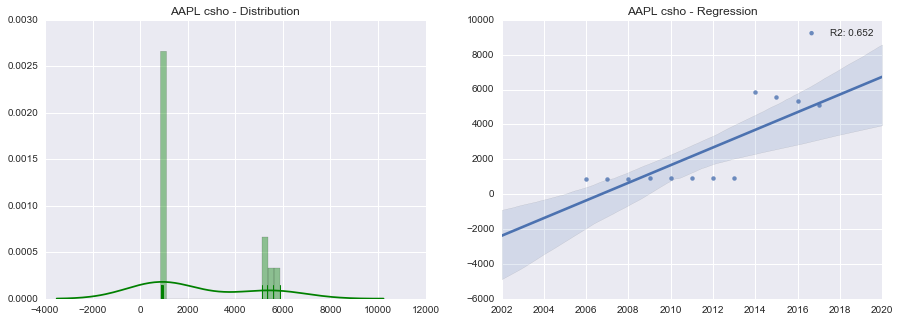

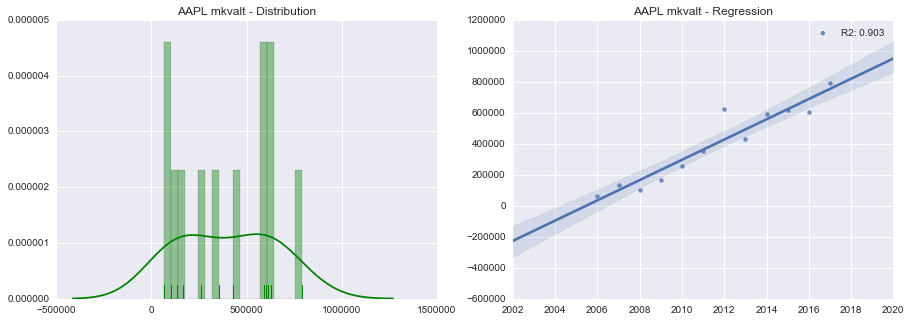

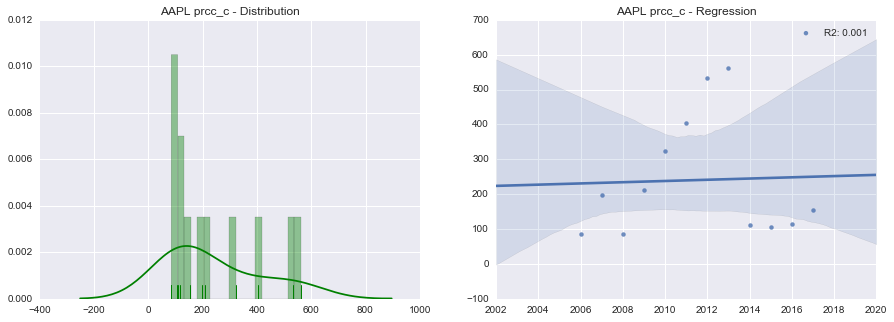

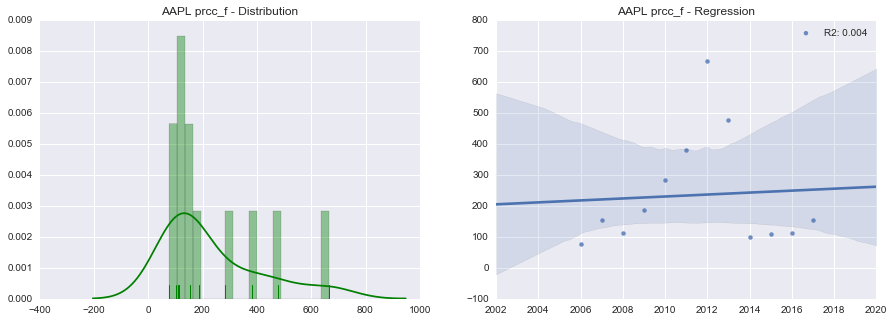

In [12]:
plot_trends(all_fin_data,d_trend_all)

In [13]:
d_trend_all

,mean,std,avg_growth_rate,slope,constant,r2
che,33559.250000,19468.068827,-0.128554,4708.038462,-9.436660e+06,0.760287
rect,16678.583333,11823.349690,-0.191443,3209.604895,-6.439442e+06,0.958000
invt,1450.750000,1312.088559,-0.175385,314.066434,-6.302939e+05,0.744835
aco,7789.583333,4832.853655,-0.097716,1191.010490,-2.387928e+06,0.789527
act,59478.166667,35098.548902,-0.168469,9422.720280,-1.889432e+07,0.936953
ppent,13083.666667,11136.055270,-0.245681,2992.125874,-6.005578e+06,0.938513
ivaeq,0.000000,0.000000,NaN,0.000000,0.000000e+00,1.000000
ivao,79103.750000,73452.242180,NaN,19934.702797,-4.001955e+07,0.957531
intan,4397.333333,3666.522760,-0.228062,961.111888,-1.928879e+06,0.893269
ao,4234.250000,2923.177167,-0.146229,743.493007,-1.491302e+06,0.840982
